In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [19]:
data = pd.read_csv(r"C:\Users\Hp\Desktop\str\nba2k-full.csv")
data.head(2)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20


In [20]:
data.shape

(439, 15)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    439 non-null    object
 1   rating       439 non-null    int64 
 2   jersey       439 non-null    object
 3   team         416 non-null    object
 4   position     439 non-null    object
 5   b_day        439 non-null    object
 6   height       439 non-null    object
 7   weight       439 non-null    object
 8   salary       439 non-null    object
 9   country      439 non-null    object
 10  draft_year   439 non-null    int64 
 11  draft_round  439 non-null    object
 12  draft_peak   439 non-null    object
 13  college      370 non-null    object
 14  version      439 non-null    object
dtypes: int64(2), object(13)
memory usage: 51.6+ KB


In [22]:
data = data.dropna()

In [23]:
data.isnull().sum().sum()

0

In [24]:
data = data.drop(['full_name', 'b_day', 'height', 'weight', 'college', 'version',], axis = 1)
data.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,#2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
3,96,#7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,#13,Houston Rockets,G,$38199000,USA,2009,1,3
5,95,#30,Golden State Warriors,G,$40231758,USA,2009,1,7
6,94,#3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1


In [25]:
def removehash(value):
    value = value[1:]
    return int(value)
data['jersey'] = data['jersey'].apply(removehash)

In [26]:
 data.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,$38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,$40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1


In [27]:
data['salary'] = data['salary'].apply(removehash)
data.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1


In [28]:
data['team'].value_counts()

Los Angeles Lakers        15
Indiana Pacers            14
Milwaukee Bucks           14
Brooklyn Nets             14
New Orleans Pelicans      14
Orlando Magic             14
Chicago Bulls             13
Los Angeles Clippers      13
Philadelphia 76ers        13
New York Knicks           13
Phoenix Suns              12
Sacramento Kings          12
Houston Rockets           12
Memphis Grizzlies         12
Detroit Pistons           12
San Antonio Spurs         12
Denver Nuggets            12
Minnesota Timberwolves    12
Atlanta Hawks             11
Dallas Mavericks          11
Boston Celtics            11
Toronto Raptors           11
Miami Heat                11
Washington Wizards        10
Cleveland Cavaliers       10
Portland Trail Blazers    10
Golden State Warriors      9
Oklahoma City Thunder      9
Utah Jazz                  8
Charlotte Hornets          7
Name: team, dtype: int64

In [29]:
data['country'].value_counts()

USA                   300
Canada                 15
Australia               7
Nigeria                 3
Cameroon                3
The Bahamas             2
Ukraine                 2
Senegal                 1
Haiti                   1
Puerto Rico             1
Dominican Republic      1
Germany                 1
Greece                  1
New Zealand             1
Philippines             1
Finland                 1
Egypt                   1
United Kingdom          1
Montenegro              1
Angola                  1
Italy                   1
Mali                    1
Lithuania               1
Israel                  1
Austria                 1
Japan                   1
Name: country, dtype: int64

In [30]:
def removecountryoutlier(value):
    if value not in ['USA', 'Canada', 'Australia']:
        return 'Others'
    else:
        return value
data['country'] = data['country'].apply(removecountryoutlier)
data['country'].value_counts()

USA          300
Others        29
Canada        15
Australia      7
Name: country, dtype: int64

In [31]:
data['position'].value_counts()

G      154
F      119
C       30
F-C     25
G-F     11
F-G      7
C-F      5
Name: position, dtype: int64

In [32]:
data.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1


In [33]:
data['draft_round'].unique

<bound method Series.unique of 1      1
3      1
4      1
5      1
6      1
      ..
433    1
434    1
435    1
437    1
438    1
Name: draft_round, Length: 351, dtype: object>

In [34]:
data['draft_peak'].unique

<bound method Series.unique of 1      15
3       2
4       3
5       7
6       1
       ..
433     7
434     2
435     1
437     6
438     3
Name: draft_peak, Length: 351, dtype: object>

In [35]:
def removeunderafted(value):
    if value == 'Undrafted':
        return
    else:
        return value
    
data['draft_round'] = data['draft_round'].apply(removeunderafted)
data['draft_peak'] = data['draft_peak'].apply(removeunderafted)
data = data.dropna()

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data['position'] = le.fit_transform(data['position'])
data['country'] = le.fit_transform(data['country'])
data['team'] = le.fit_transform(data['team'])
data.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,12,2,32742000,3,2011,1,15
3,96,7,2,2,37199000,3,2007,1,2
4,96,13,10,5,38199000,3,2009,1,3
5,95,30,9,5,40231758,3,2009,1,7
6,94,3,13,3,27093019,3,2012,1,1


In [37]:
data.describe()

,rating,jersey,team,position,salary,country,draft_year
count,299.000000,299.000000,299.000000,299.000000,2.990000e+02,299.000000,299.000000
mean,77.591973,13.755853,14.655518,3.327759,1.023471e+07,2.785953,2014.237458
std,6.237530,14.925450,8.356069,1.745444,1.070082e+07,0.580156,3.868710
min,68.000000,0.000000,0.000000,0.000000,7.956800e+04,0.000000,2003.000000
25%,73.000000,3.000000,8.000000,2.000000,2.300922e+06,3.000000,2012.000000
50%,76.000000,10.000000,15.000000,3.000000,5.718000e+06,3.000000,2015.000000
75%,80.000000,21.500000,22.000000,5.000000,1.376370e+07,3.000000,2018.000000
max,97.000000,99.000000,29.000000,6.000000,4.578097e+07,3.000000,2019.000000


In [38]:
x= data.drop(['salary'], axis = 1)
y = data['salary']

In [39]:
x.head(2)

,rating,jersey,team,position,country,draft_year,draft_round,draft_peak
1,97,2,12,2,3,2011,1,15
3,96,7,2,2,3,2007,1,2


In [40]:
y.head(2)

1    32742000
3    37199000
Name: salary, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

In [43]:
data1 = y_test-predictions

In [44]:
data1

102   -3.219286e+06
399    4.936225e+06
344    9.044410e+05
377    3.391774e+06
200   -7.087221e+05
145   -7.411133e+06
96    -4.122602e+06
329    4.110412e+06
154    4.913264e+06
320    1.595313e+06
300    4.888000e+05
388    3.484558e+06
303    6.500931e+06
93    -2.204299e+06
31    -1.262886e+07
354    2.224388e+06
90    -5.410611e+05
54    -4.989568e+06
118    2.021523e+06
224   -1.875662e+06
306    9.341744e+06
363    2.268836e+06
17     8.209893e+06
60    -9.180677e+06
347    1.110197e+06
318   -3.103711e+06
153   -8.783226e+06
151   -3.456564e+06
215    1.729672e+06
87    -6.258634e+06
84     2.235172e+06
95    -3.789649e+06
267   -3.932253e+06
18    -1.671644e+07
437    7.179672e+06
263   -5.255291e+06
226   -3.230321e+05
242   -2.896914e+06
378    2.050025e+06
36     1.889455e+06
70     3.562851e+06
5      5.296942e+06
43     1.205303e+07
273   -4.174815e+05
65    -2.545651e+06
140   -5.590275e+05
24     1.657090e+06
386    3.226635e+06
23     5.010603e+06
152   -6.087795e+06


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

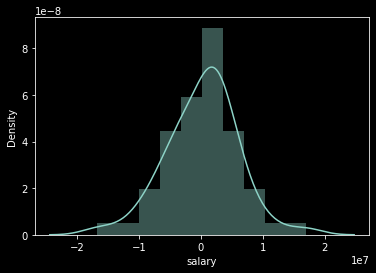

In [46]:
import seaborn as sns
sns.distplot(data1)

In [48]:
import pickle
pickle.dump(lr, open('./model.sav', 'wb'))